Импорт всех нужных модулей и библиотек

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

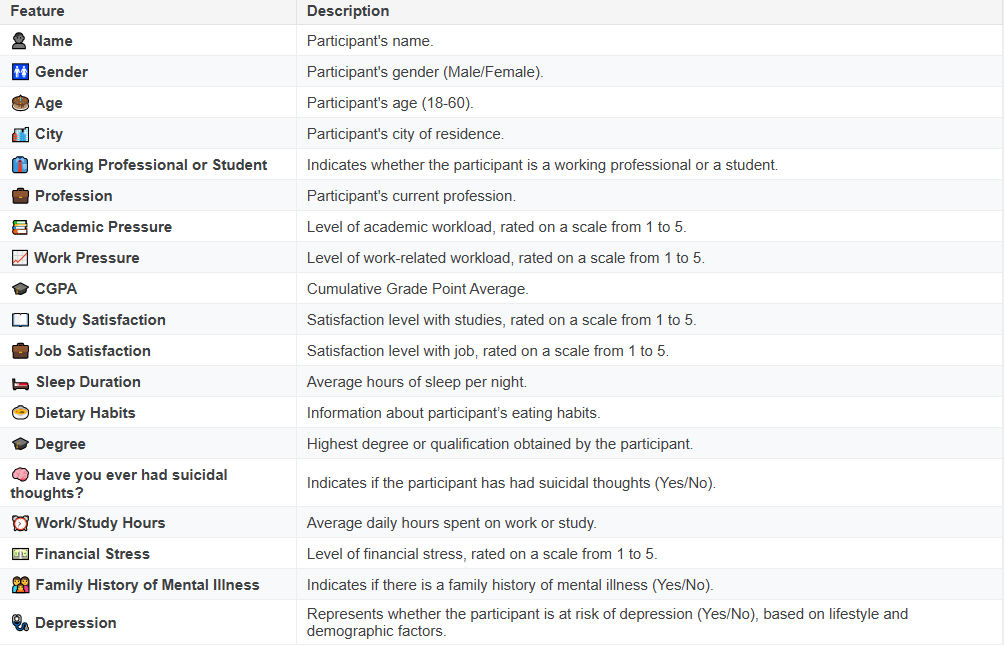

# Препроцессинг данных

Загрузка данных и их предпросмотр

In [188]:
data = pd.read_csv('train.csv')
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


Проверим целевую переменную на сбалансированность:

In [189]:
data[data['Depression'] == 0].count()

id                                       115133
Name                                     115133
Gender                                   115133
Age                                      115133
City                                     115133
Working Professional or Student          115133
Profession                                98098
Academic Pressure                         11561
Work Pressure                            103560
CGPA                                      11562
Study Satisfaction                        11563
Job Satisfaction                         103563
Sleep Duration                           115133
Dietary Habits                           115131
Degree                                   115132
Have you ever had suicidal thoughts ?    115133
Work/Study Hours                         115133
Financial Stress                         115130
Family History of Mental Illness         115133
Depression                               115133
dtype: int64

In [190]:
data[data['Depression'] == 1].count()

id                                       25567
Name                                     25567
Gender                                   25567
Age                                      25567
City                                     25567
Working Professional or Student          25567
Profession                                5972
Academic Pressure                        16336
Work Pressure                             9222
CGPA                                     16336
Study Satisfaction                       16334
Job Satisfaction                          9227
Sleep Duration                           25567
Dietary Habits                           25565
Degree                                   25566
Have you ever had suicidal thoughts ?    25567
Work/Study Hours                         25567
Financial Stress                         25566
Family History of Mental Illness         25567
Depression                               25567
dtype: int64

Классы явно не сбалансированы, в будущем для их "уравновешивания" потребуется заполнить датасет синтетическими данными.

Первичный осмотр данных даёт следующий вывод:
1) В данных присутствуют пропуски
2) Колонки id и Name не должны участвовать в обучении

Таким образом, набор данных будет выглядеть следующим образом:

In [191]:
data = data.drop(columns = ['Name', 'id'])
data.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-null  object 
 3   Working Professional or Student        140700 non-null  object 
 4   Profession                             104070 non-null  object 
 5   Academic Pressure                      27897 non-null   float64
 6   Work Pressure                          112782 non-null  float64
 7   CGPA                                   27898 non-null   float64
 8   Study Satisfaction                     27897 non-null   float64
 9   Job Satisfaction                       112790 non-null  float64
 10  Sleep Duration                         140700 non-null  

In [193]:
data.isna().sum()

Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

В некоторых признаках отсутсвует значимое количество данных, одним из решений будет убрать следующие признаки из набора данных: Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction.

In [194]:
to_del = ['Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction']
data_new = data.drop(columns = to_del)
print(data_new.isna().sum())
print("""
    #################
    """)
print(data_new.info())

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Sleep Duration                           0
Dietary Habits                           4
Degree                                   2
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         4
Family History of Mental Illness         0
Depression                               0
dtype: int64

    #################
    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140700 non-null  object 
 1   Age                                    140700 non-null  float64
 2   City                                   140700 non-n

Теперь стоит дополнить данными те колонки, в которых всё ещё присутствуют "пропуски". Вероятно, пропуски данных обозначены как nan.

In [195]:
data_new['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

Для того, чтобы избавиться от nan, нужно использовать fillna.

In [196]:
data_new['Dietary Habits'] = data_new['Dietary Habits'].fillna('0')

In [197]:
print(data_new['Degree'].unique())
data_new['Degree'] = data_new['Degree'].fillna('B')

['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'Marsh' 'HCA' '5.88' 'B.Student' 'LL B.Ed'
 'M.S' 'Navya' 'Mahika' nan 'K.Ed' 'B.3.79' 'Mthanya'
 'Working Professional' 'Esha' 'LLS' 'LLEd' 'E.Tech' 'Doctor' 'N.Pharm'
 'LCA' 'B B.Com' 'RCA' 'Mihir' 'Advait']


In [198]:
print(data_new['Financial Stress'].unique())
data_new['Financial Stress'] = data_new['Financial Stress'].fillna(3)
print(data_new['Financial Stress'].unique())

[ 2.  3.  1.  4.  5. nan]
[2. 3. 1. 4. 5.]


In [199]:
print(data_new.isna().sum())

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [200]:
data_new.head()

,Gender,Age,City,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


Воспользоваться корреляционной матрицей не получится, поскольку некоторые признаки имеют нецелочисленные значения. 
Возможны два варианта:
1) Через One-hot encoder закодировать некоторые признаки(сделать их категориальными).
2) Посмотреть по гистограммам каждый признак-таргет.

In [201]:
data_to_plot=data_new.replace([np.inf, -np.inf], np.nan)

In [202]:
def sns_plot(X):
    return sns.displot(data=data_to_plot, x=X, hue="Depression", multiple="stack", height = 5, aspect = 2).set(title=X)

Просмотр гистограмм о взаимосвязанности целевой переменной с другими признаками

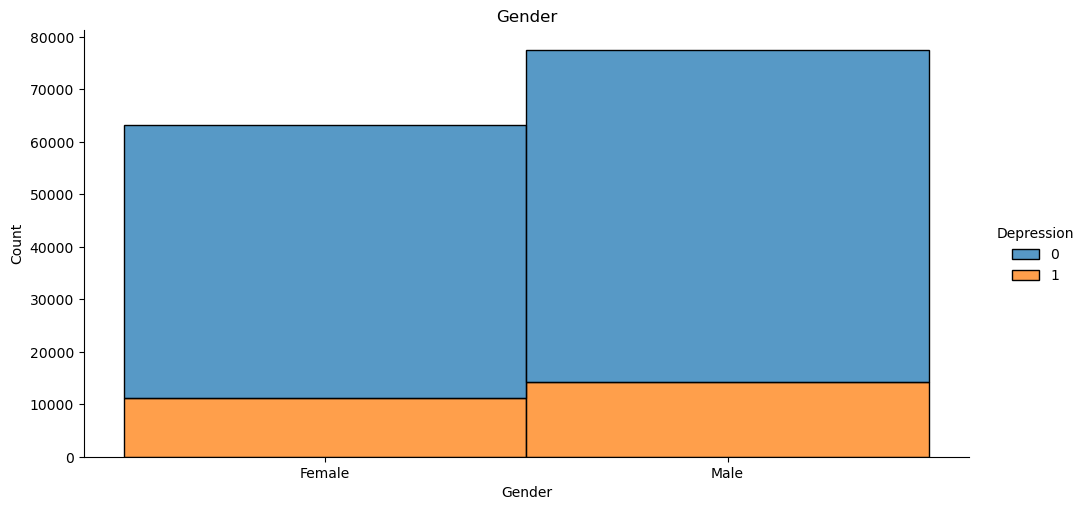

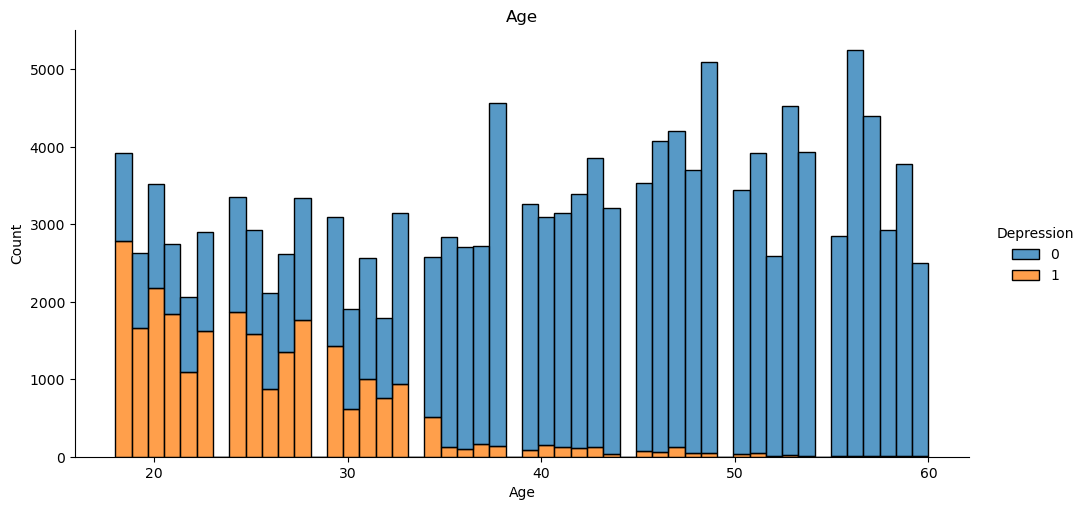

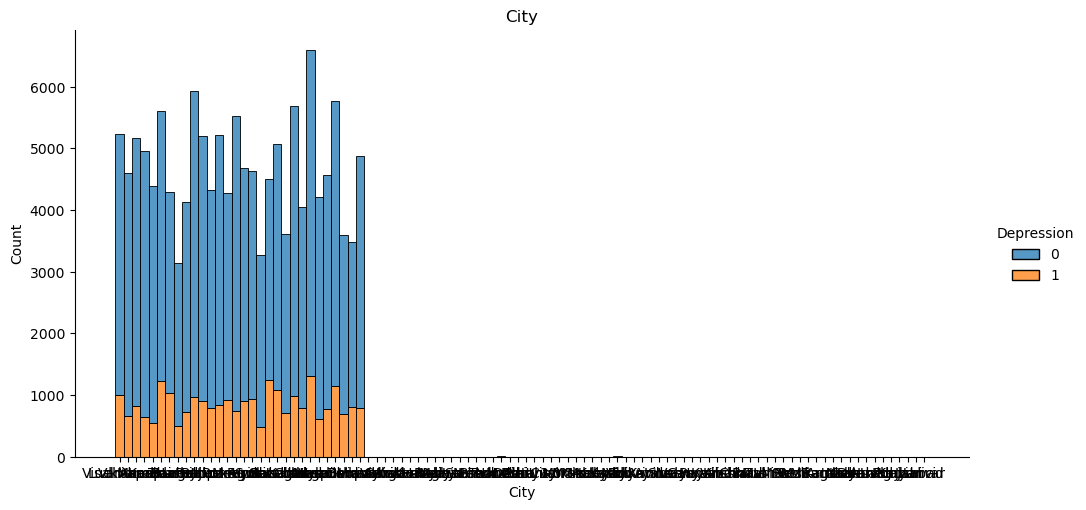

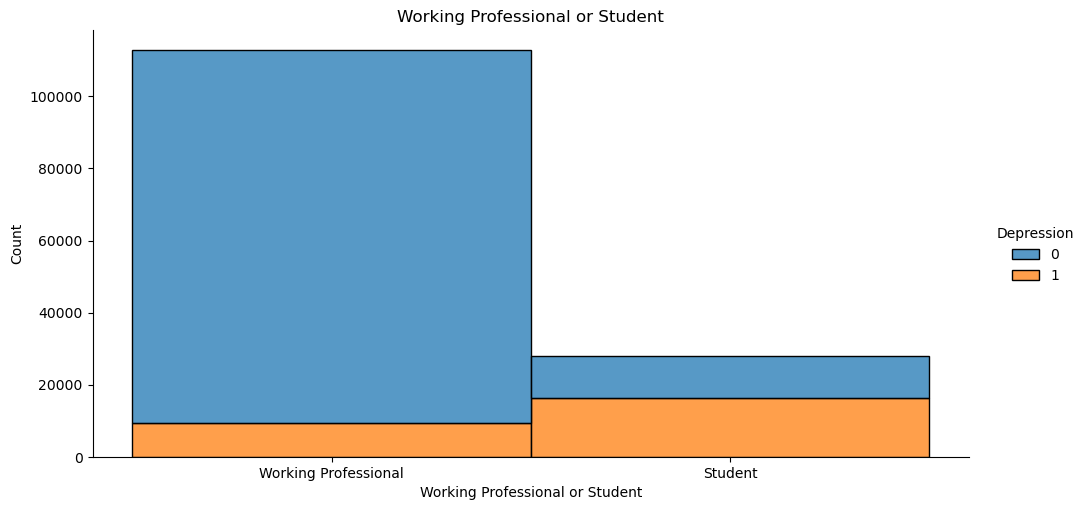

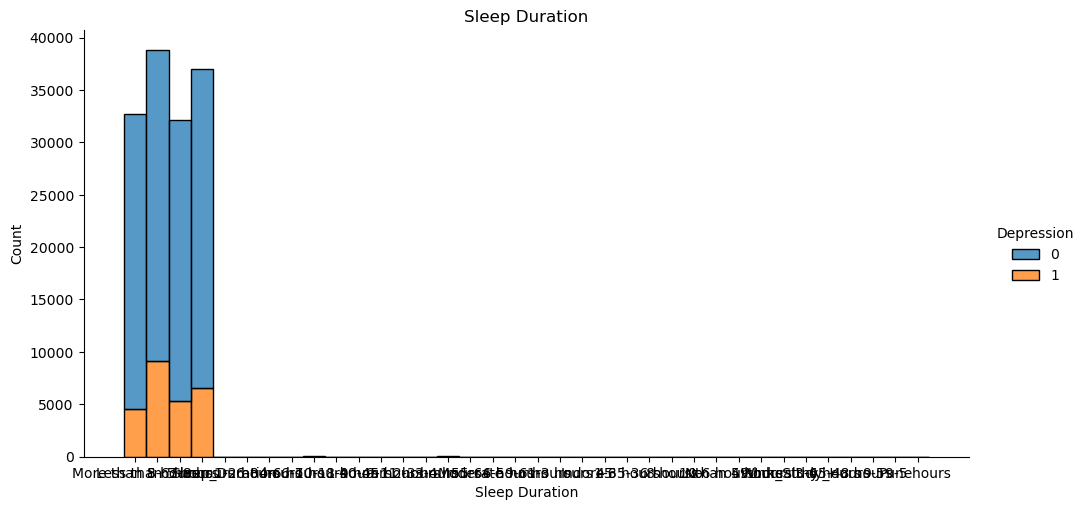

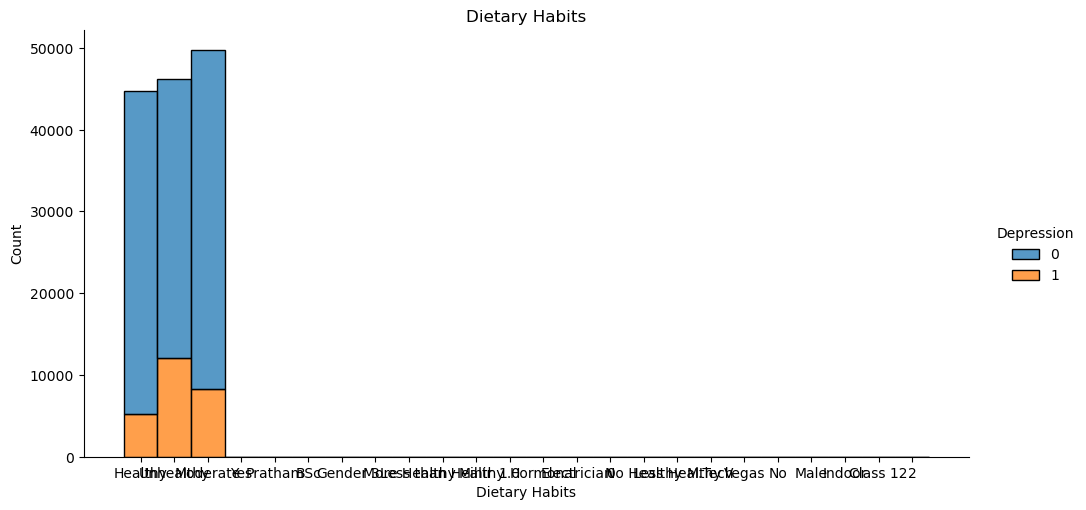

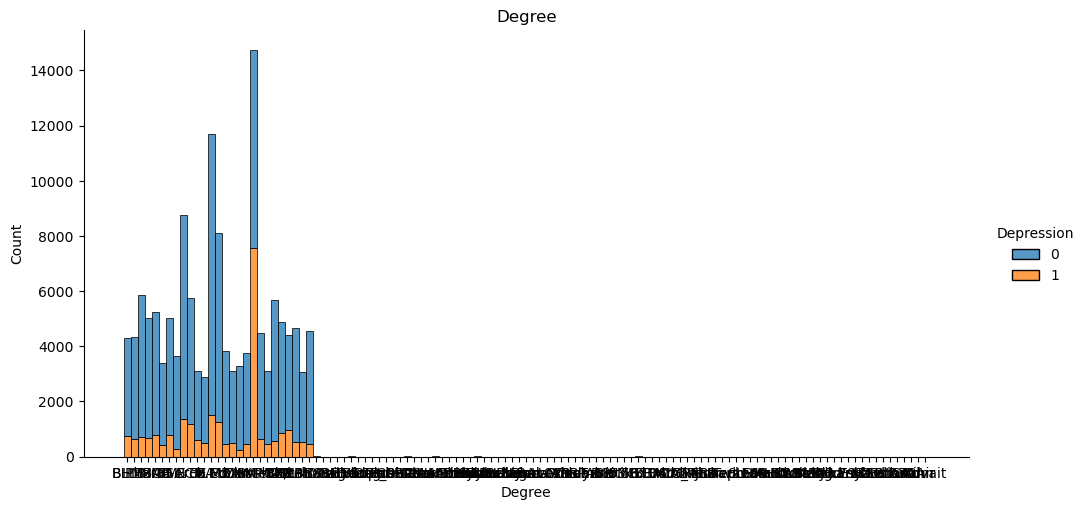

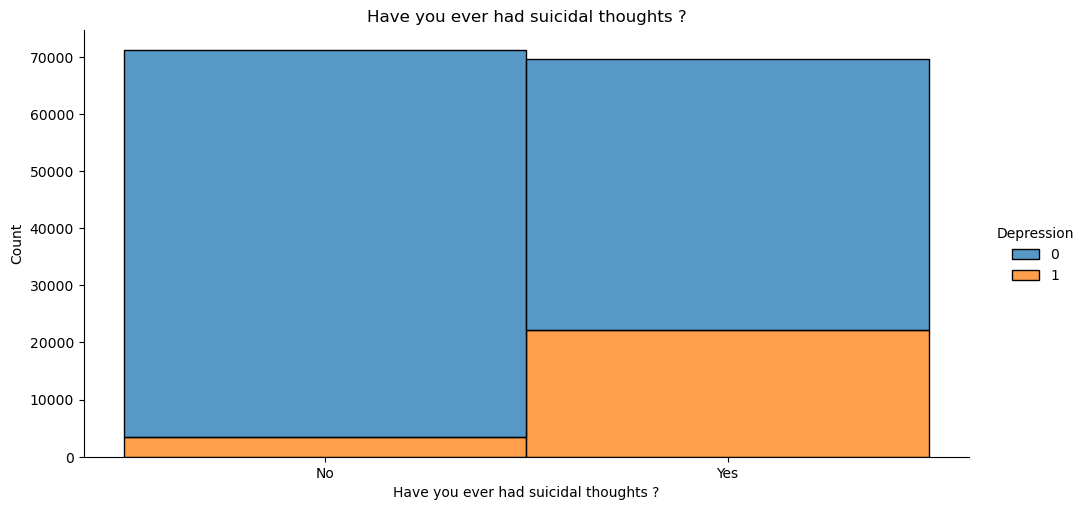

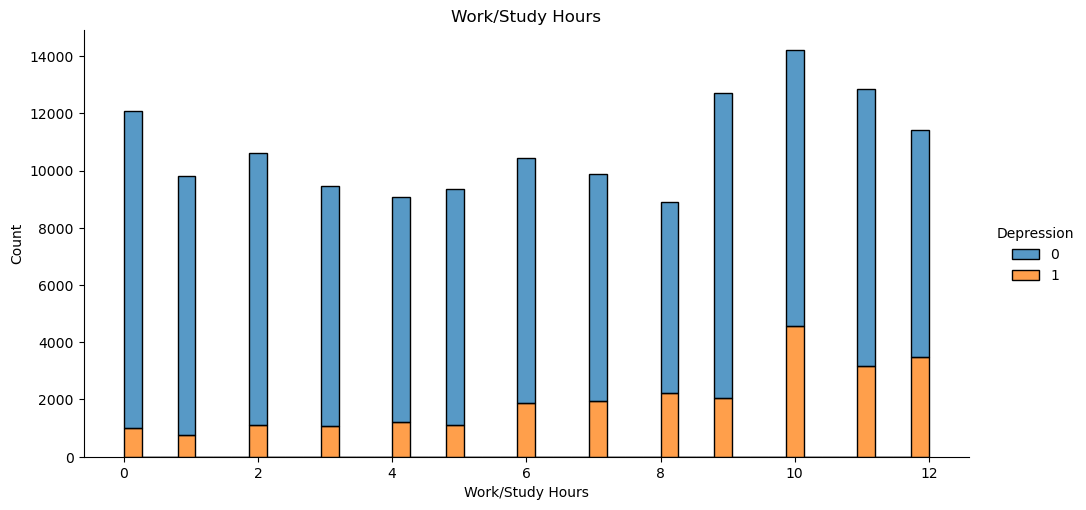

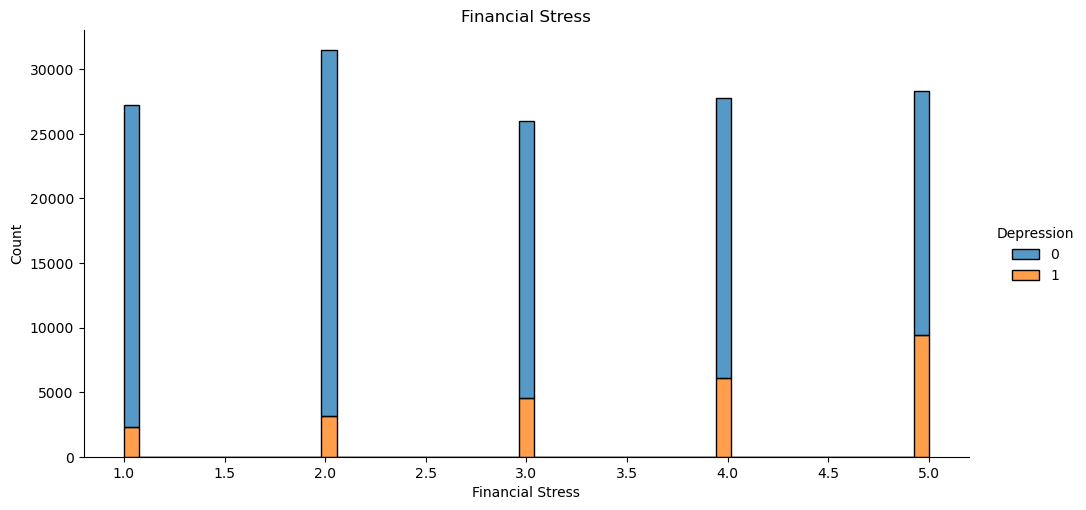

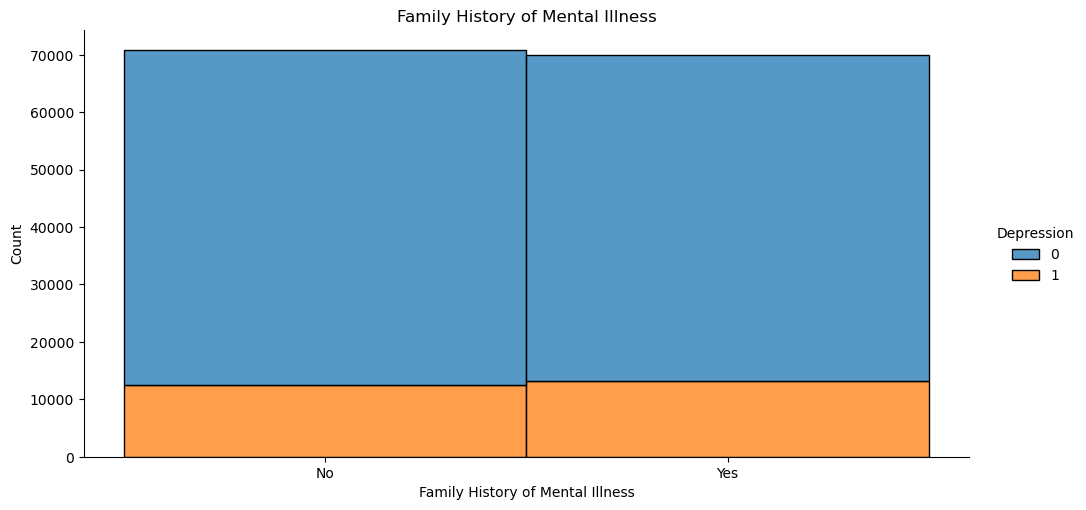

In [203]:
for i in data_new.drop(columns = 'Depression').columns: sns_plot(i)

Некоторые гистограммы, например "Город", трудночитаемы, для этого можно сделать следующие преобразования:

In [204]:
t1 = [i for i in data_new.loc[data_new['Depression'] == 1].groupby('City')['Depression'].count()]
t2_index = [i for i in data_new.loc[data_new['Depression'] == 1].groupby('City')['Depression'].count().index]
a = []
for i, j in zip (t2_index, t1):
    if j >= 500:
        a.append(i)

In [205]:
city_plot = data.loc[data_new['City'].isin(a)]

In [206]:
print(len(city_plot))
print(len(data_to_plot))

134190
140700


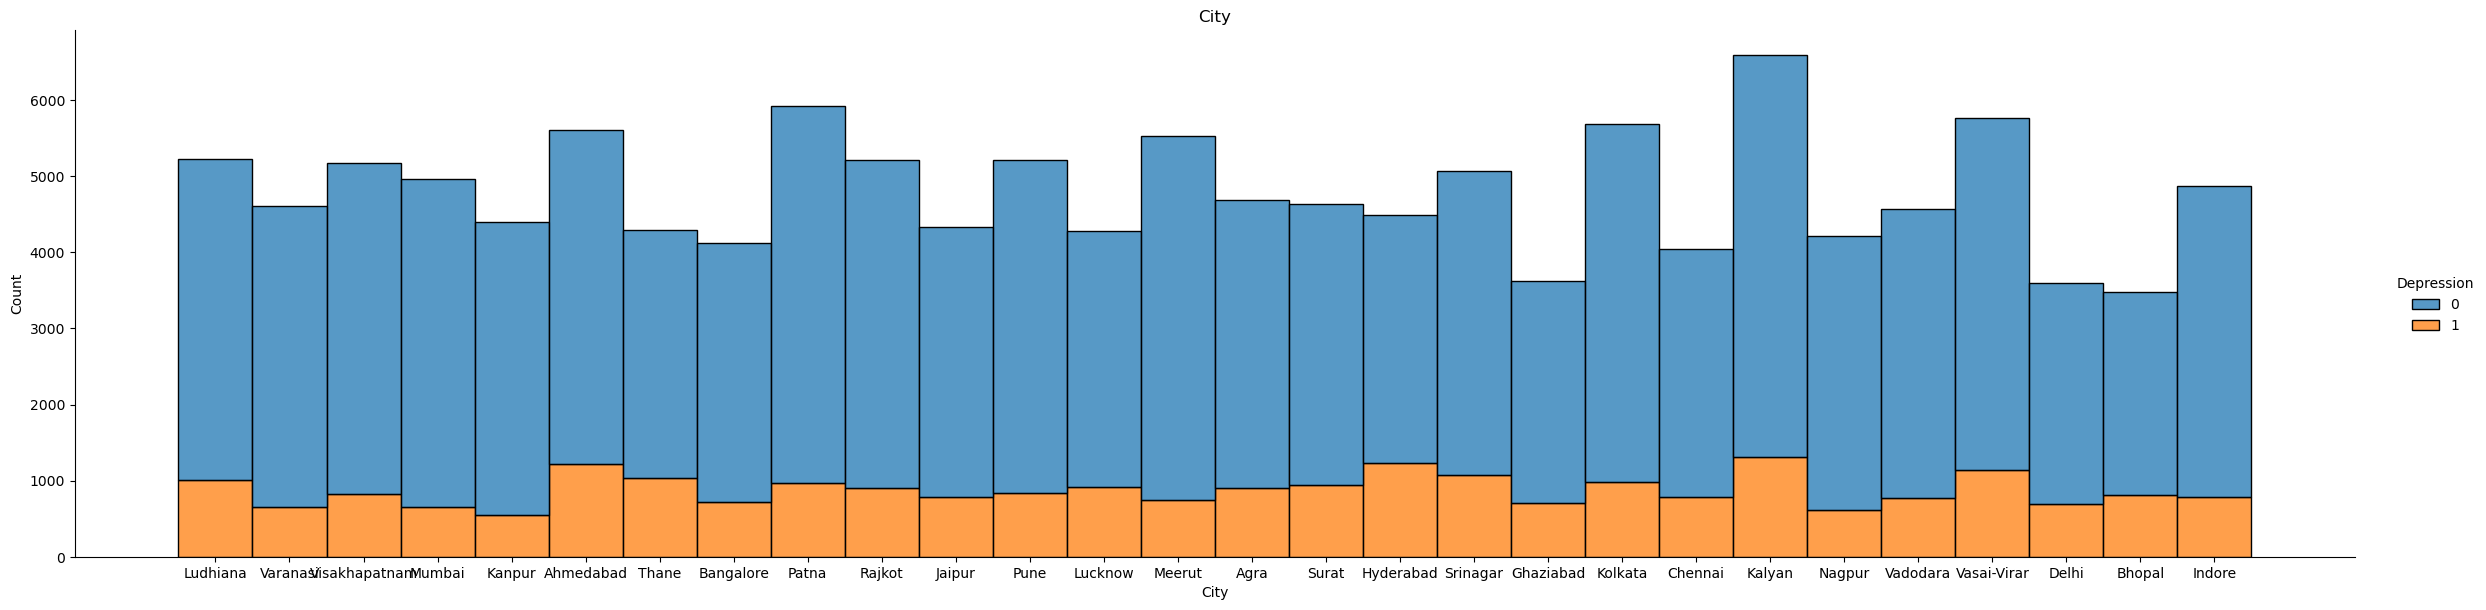

In [207]:
sns.displot(data=city_plot, x='City', hue="Depression", multiple="stack", height = 6, aspect = 4, legend = True).set(title='City')

Для того, чтобы можно было рассчитать коэффициенты корреляции, нужно некоторые признаки сделать категориальными. 

In [208]:
data_new_cat = data_new.copy()
data_new_cat['Gender'] = data_new['Gender'].astype('category').cat.codes
data_new_cat['City'] = data_new['City'].astype('category').cat.codes
data_new_cat['Working Professional or Student'] = data_new['Working Professional or Student'].astype('category').cat.codes
data_new_cat['Sleep Duration'] = data_new['Sleep Duration'].astype('category').cat.codes
data_new_cat['Dietary Habits'] = data_new['Dietary Habits'].astype('category').cat.codes
data_new_cat['Degree'] = data_new['Degree'].astype('category').cat.codes
data_new_cat['Have you ever had suicidal thoughts ?'] = data_new['Have you ever had suicidal thoughts ?'].astype('category').cat.codes
data_new_cat['Family History of Mental Illness'] = data_new['Family History of Mental Illness'].astype('category').cat.codes
data_new_cat.head(5)

,Gender,Age,City,Working Professional or Student,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,50,1,29,8,33,0,1.0,2.0,0,0
1,1,26.0,93,1,27,21,63,1,7.0,3.0,0,1
2,1,33.0,97,0,15,8,21,1,3.0,1.0,0,1
3,1,22.0,64,1,27,16,28,1,10.0,1.0,1,1
4,0,30.0,37,1,15,21,28,1,9.0,4.0,1,0


In [209]:
corr = data_new_cat.corr()

<Axes: >

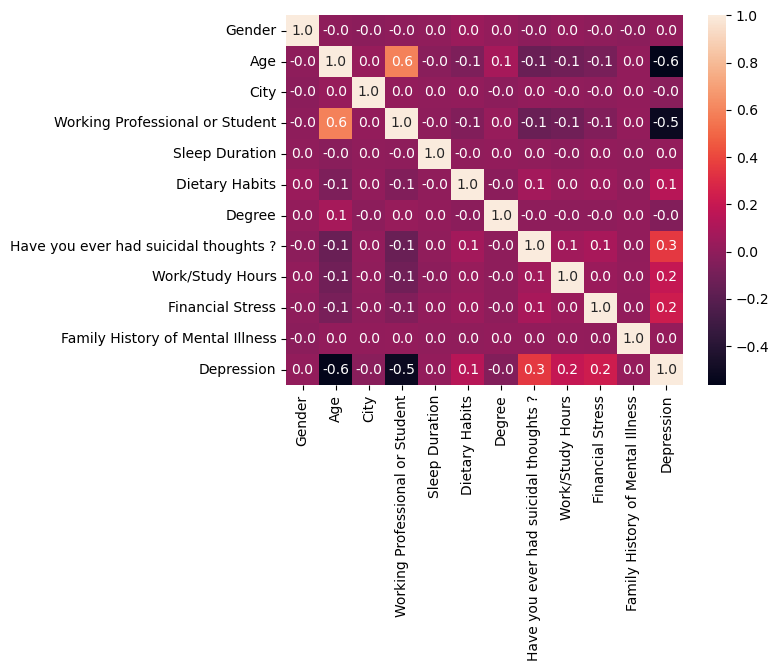

In [210]:
sns.heatmap(corr, annot = True, fmt=".01f")

Теплокарта отлично позволяет увидеть существующие зависимости со следующими признаками:

Возраст явно влияет на целевой показатель, при повышении возраста депрессия уменьшаетс
я

Точно также признак "Working Professional or Student" имеет выраженную зависимость с таргетом. Если обратиться после матрицы корреляции к гистограммам по двум выше описанным случаям, то вывод таков:

1) Чем больше лет человеку, тем меньше депрессивных мыслей.

2) Люди, которые работают, в своей массе имеют в 10 раз меньше депрессивных мыслей, нежели студенты.

То есть, неработоспособные студенты в возрасте до 25 лет наиболее всего подвержены депрессивным мыслям

In [211]:
data_train = data_new.drop(columns = ['Gender', 'City', 'Sleep Duration', 'Degree', 'Family History of Mental Illness', 'Dietary Habits'])
data_train['Working Professional or Student'] = data_train['Working Professional or Student'].apply(lambda x: 1 if x == 'Working Professional' else 0)
data_train['Have you ever had suicidal thoughts ?'] = data_train['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes' else 0)

In [212]:
data_train.head(5)

,Age,Working Professional or Student,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression
0,49.0,1,0,1.0,2.0,0
1,26.0,1,1,7.0,3.0,1
2,33.0,0,1,3.0,1.0,1
3,22.0,1,1,10.0,1.0,1
4,30.0,1,1,9.0,4.0,0


Заполнение датасета синтетическими данными.

In [213]:
from imblearn.over_sampling import SMOTE

In [214]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=12)
X_resampled, y_resampled = smote.fit_resample(data_train.drop(columns='Depression'), data_train['Depression'])

In [215]:
X_resampled['Depression'] = y_resampled
data_train = X_resampled

## Тестовые данные

Теперь нужно проделать те же действия с тестовым датасетом

In [216]:
data_test = pd.read_csv("test.csv")
data_test.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [217]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [218]:
data_test = data_test.drop(columns = ['Name', 'id'])
data_test.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [219]:
data_test.isna().sum()

Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [220]:
to_del = ['Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Gender', 'City', 'Sleep Duration', 'Degree', 'Family History of Mental Illness', 'Dietary Habits']
data_test_new = data_test.drop(columns = to_del)
print(data_test_new.isna().sum())


Age                                      0
Working Professional or Student          0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
dtype: int64


In [221]:
print(data_test_new.isna().sum())

Age                                      0
Working Professional or Student          0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
dtype: int64


In [222]:
data_test_new['Working Professional or Student'] = data_test_new['Working Professional or Student'].apply(lambda x: 1 if x == 'Working Professional' else 0)
data_test_new['Have you ever had suicidal thoughts ?'] = data_test_new['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes' else 0)

In [223]:
data_test_new.head(5)

,Age,Working Professional or Student,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress
0,53.0,1,0,9.0,3.0
1,58.0,1,0,6.0,4.0
2,53.0,1,1,12.0,4.0
3,23.0,0,1,10.0,4.0
4,47.0,1,1,3.0,4.0


In [224]:
data_test = data_test_new

# Обучение моделей

In [225]:
data_train

,Age,Working Professional or Student,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression
0,49.0,1,0,1.0,2.0,0
1,26.0,1,1,7.0,3.0,1
2,33.0,0,1,3.0,1.0,1
3,22.0,1,1,10.0,1.0,1
4,30.0,1,1,9.0,4.0,0
...,...,...,...,...,...,...
230261,30.0,0,1,11.0,5.0,1
230262,32.0,0,1,5.0,5.0,1
230263,21.0,0,1,11.0,4.0,1
230264,29.0,0,1,11.0,1.0,1


In [226]:
data_train['Working Professional or Student'].unique()

array([1, 0], dtype=int64)

## Логистическая регрессия

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns = 'Depression'), data_train['Depression'], test_size = 0.25)

In [229]:
model = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train, y_train)

In [230]:
coefficients = model.coef_[0] #  coefficients of the features
coeff_df = pd.DataFrame({
    'Feature': data_train.drop(columns='Depression').columns,
    'Coefficient': coefficients
}) # coefficients with their corresponding feature

In [231]:
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending = False).index)
coeff_df

,Feature,Coefficient
2,Have you ever had suicidal thoughts ?,2.372379
1,Working Professional or Student,-1.674858
4,Financial Stress,0.544917
0,Age,-0.159899
3,Work/Study Hours,0.131556


In [232]:
model.score(X_test, y_test)

0.899039380200462

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
model = LogisticRegression()
params = {'penalty':['l2'], 'solver': ['lbfgs', 'saga'], 'max_iter': [100, 150, 200, 250]}
gsv = GridSearchCV(model, params, verbose = 1)
gsv.fit(X_train, y_train)
estimator = gsv.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [235]:
estimator.score(X_test, y_test)

0.899039380200462

## Ансамбль деревьев

In [236]:
from sklearn.ensemble import RandomForestClassifier

In [237]:
rfc_model = RandomForestClassifier()
rfc_params = {'max_depth':[2, 3, 4, 5, 6], 'min_samples_split':[2], 'n_estimators':[100, 200], 'criterion':['gini', 'entropy', 'log_loss']}
rfc_gsv = GridSearchCV(rfc_model, rfc_params, verbose = 1)
rfc_gsv.fit(X_train, y_train)
estimator = rfc_gsv.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [238]:
estimator.score(X_test, y_test)

0.902982611565654

In [239]:
from sklearn import tree

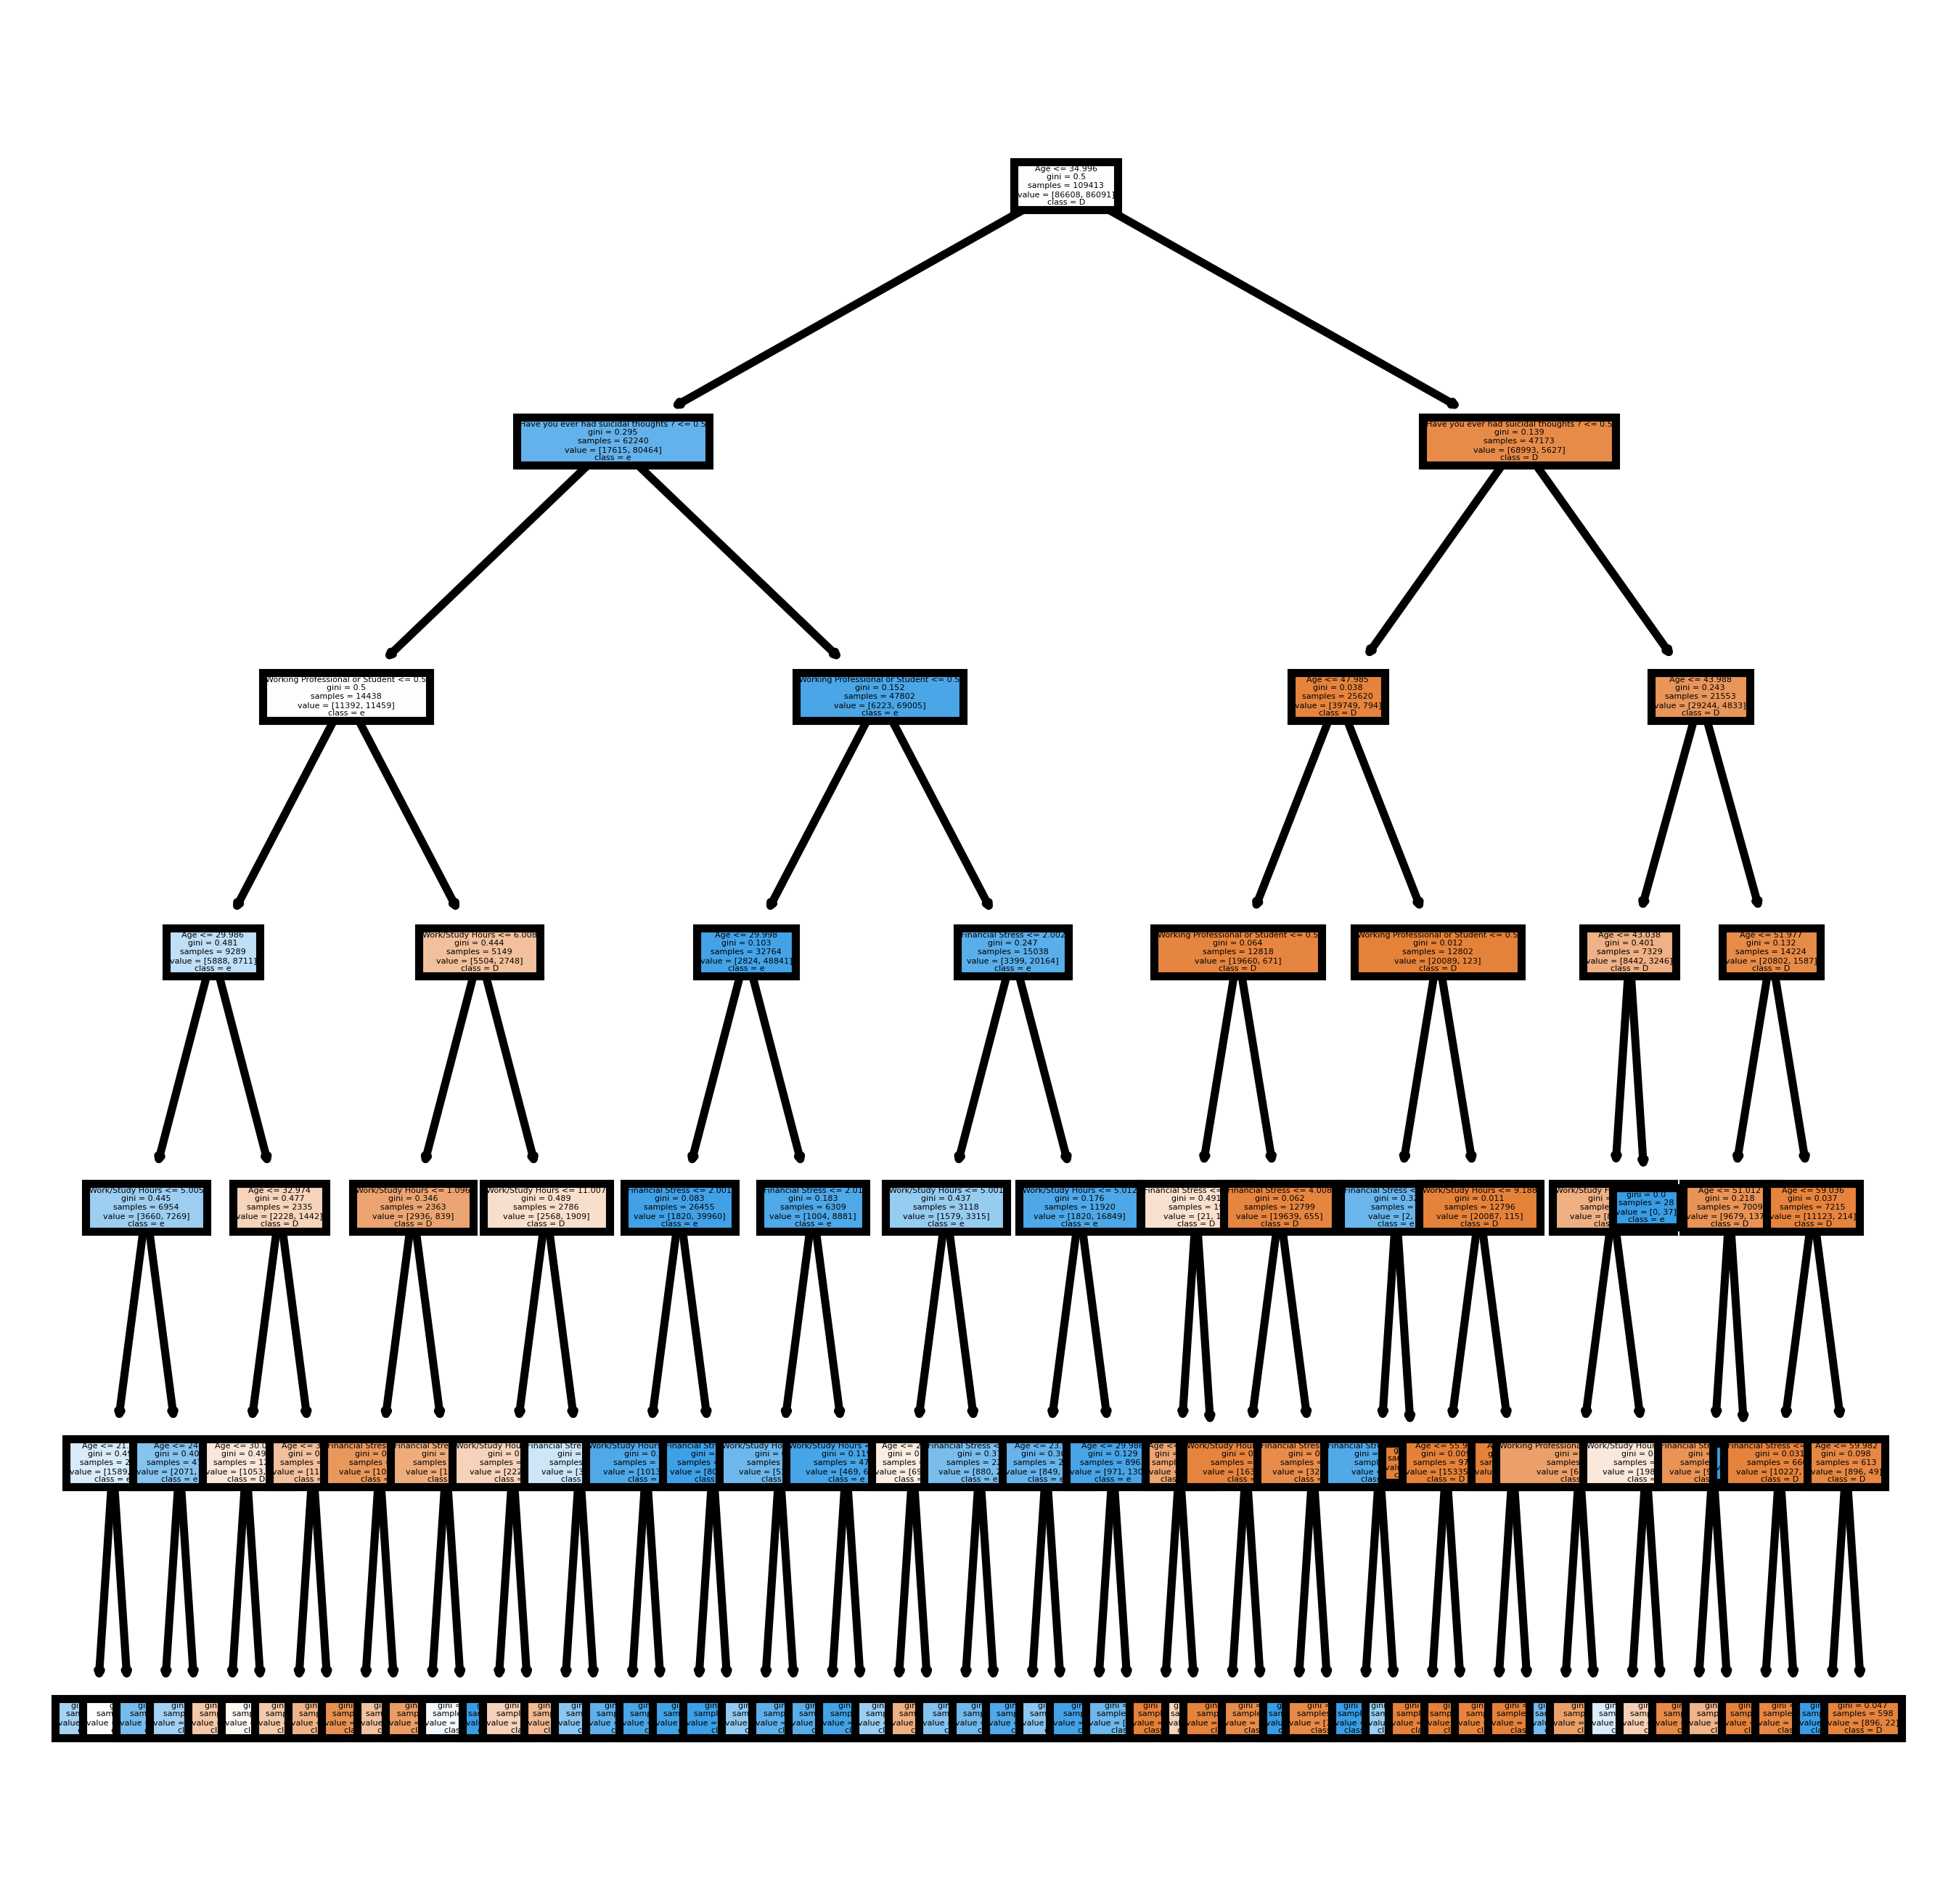

In [240]:
fn=X_train.columns
cn=y_train.name
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);


## XGB классификатор

In [241]:
from xgboost import XGBClassifier

In [242]:
import warnings
warnings.filterwarnings("ignore")

In [243]:
xgb_model = XGBClassifier()
xgb_params = {
            'device': ["cuda"],
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [4, 5],
            'classifier__learning_rate': [0.01, 0.05, 0.1],
            'classifier__gamma': [0, 1],
            'classifier__lambda': [1, 2],
            'classifier__alpha': [0, 1],
            'classifier__min_child_weight': [1, 2, 3],  # Helps prevent overfitting
            'classifier__max_delta_step': [0, 1]  # For stability
        }

xgb_gsv = GridSearchCV(xgb_model, xgb_params, verbose = 1)
xgb_gsv.fit(X_train, y_train)
xgb_
estimator = xgb_gsv.best_estimator_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


KeyboardInterrupt: 

In [ ]:
xgb_estimator.score(X_test, y_test)

In [ ]:
# pred = estimator.predict(data_test)



In [ ]:
# data_test_to_sub = pd.read_csv('test.csv')


In [ ]:
# submission = pd.DataFrame({'id': [], 'Depression': []})
# submission['id'] = data_test_to_sub['id']
# submission['Depression'] = pred

In [ ]:
# submission.head(4)

In [ ]:
# submission.to_csv('submission.csv', index = False)

In [ ]:
!pip install gspread

In [244]:
from gspread import Client, Spreadsheet, Worksheet, service_account, utils

In [294]:
def API_sheets():
    conn = service_account(filename = 'static-anchor-443908-t3-886717e3f860.json')
    table_url = 'https://docs.google.com/spreadsheets/d/1j-Vm2RRJ9ibSxoYc50gVs5ip1YFSCp0r3KpwIbkMxuo'
    spreadsheet = conn.open_by_key('1j-Vm2RRJ9ibSxoYc50gVs5ip1YFSCp0r3KpwIbkMxuo')
    worksheet = spreadsheet.get_worksheet(0)
    return worksheet.get_all_values()

In [295]:
data = API_sheets()

In [296]:
import csv
with open('output.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows(data)


In [297]:
test = pd.read_csv('output.csv')
test.head()

,Отметка времени,Имя/Псевдоним,Возраст,"Работа/Учёба (в случае совмещения выбирать вариант с ""Работа"")",Были ли депрессивные мысли?,Сколько часов затрачивается на работу/учёбу,Финансовый стресс(от 1 до 5)
0,07.12.2024 14:17:58,nkt,22,Работа,Да,20,2
1,07.12.2024 14:18:31,Денис,22,Работа,Нет,10,3
2,07.12.2024 14:18:36,Кирилл Ш,22,Работа,Нет,20,3
3,07.12.2024 14:18:40,Roman,44,Работа,Нет,16,1
4,07.12.2024 14:18:42,Anon,22,Учёба,Да,20,3


In [298]:
test['Работа/Учёба (в случае совмещения выбирать вариант с "Работа")'] = test['Работа/Учёба (в случае совмещения выбирать вариант с "Работа")'].apply(lambda x: 1 if x == 'Работа' else 0)
test['Были ли депрессивные мысли?'] = test['Были ли депрессивные мысли?'].apply(lambda x: 1 if x == 'Да' else 0)

In [299]:
test

,Отметка времени,Имя/Псевдоним,Возраст,"Работа/Учёба (в случае совмещения выбирать вариант с ""Работа"")",Были ли депрессивные мысли?,Сколько часов затрачивается на работу/учёбу,Финансовый стресс(от 1 до 5)
0,07.12.2024 14:17:58,nkt,22,1,1,20,2
1,07.12.2024 14:18:31,Денис,22,1,0,10,3
2,07.12.2024 14:18:36,Кирилл Ш,22,1,0,20,3
3,07.12.2024 14:18:40,Roman,44,1,0,16,1
4,07.12.2024 14:18:42,Anon,22,0,1,20,3
5,07.12.2024 14:18:44,Хххххххххххх,22,1,1,55,3
6,07.12.2024 14:18:47,Крис,22,1,1,5,5
7,07.12.2024 14:18:48,Кирилл,22,1,1,60,5
8,07.12.2024 14:19:03,trt,22,1,0,11,2
9,07.12.2024 14:19:05,Мистер лис,22,1,0,55,3


In [300]:
test = test.rename(columns={'Возраст':'Age', 'Были ли депрессивные мысли?':'Have you ever had suicidal thoughts ?', 'Сколько часов затрачивается на работу/учёбу':'Work/Study Hours', 'Работа/Учёба (в случае совмещения выбирать вариант с "Работа")':'Working Professional or Student', 'Финансовый стресс(от 1 до 5)':'Financial Stress'})

In [301]:
out = test.iloc[:, [2, 3, 4, 5, 6]]

In [302]:
to_disp = pd.DataFrame({'Имя':test['Имя/Псевдоним'], 'Депрессия':estimator.predict(out)})
to_disp['Депрессия'] = to_disp['Депрессия'].apply(lambda x: 'Да' if x == 1 else 'Нет')
to_disp

,Имя,Депрессия
0,nkt,Да
1,Денис,Да
2,Кирилл Ш,Да
3,Roman,Нет
4,Anon,Да
5,Хххххххххххх,Да
6,Крис,Да
7,Кирилл,Да
8,trt,Нет
9,Мистер лис,Да
